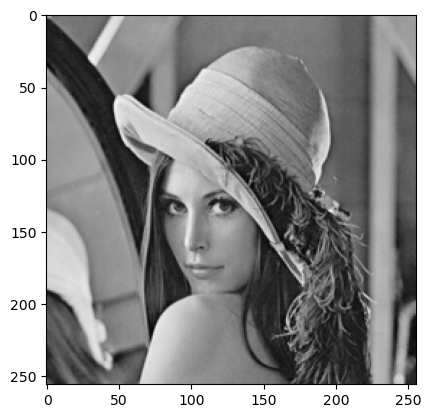

In [715]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
# 读取bmp格式图片
img = mpimg.imread('./imagedata/lena.bmp')

# 显示图片
plt.imshow(img, cmap='gray')
plt.show()


In [716]:
def shift_center(point, center_point):
    return (point[0]-center_point[0], point[1]-center_point[1])

In [717]:
def shift_center_inverse(point, center_point):
    return (point[0]+center_point[0], point[1]+center_point[1])

In [718]:
def rotate_point(point, alpha):
    x = math.cos(alpha)*point[0]+math.sin(alpha)*point[1]
    y = -math.sin(alpha)*point[0]+math.cos(alpha)*point[1]
    return (x,y)

In [719]:
def inverse_rotate_point(point, alpha):
    x = math.cos(alpha)*point[0]-math.sin(alpha)*point[1]
    y = math.sin(alpha)*point[0]+math.cos(alpha)*point[1]
    return (x,y)

In [721]:
def inverse_rotate_point_shift(point, center_point0,center_point1,alpha):
    return shift_center_inverse(inverse_rotate_point(shift_center(point, center_point1), alpha),center_point0)

In [722]:
def Bi_linear_interpolation(point0, img):
    i,j = math.floor(point0[0]), math.floor(point0[1])
    u,v = point0[0]-i, point0[1]-j
    return (1-u)*(1-v)*img[j,i] + (1-u)*v*img[j+1,i] + u*(1-v)*img[j,i+1] + u*v*img[j+1,i+1]

In [723]:
def rotate_img(img,angle):
    # 计算原图的大小和图像的中心点
    height0, width0 = img.shape[0], img.shape[1]
    center_point0 = ((height0-1)/2,(width0-1)/2)
    
    # 计算旋转过后的图像大小和中心点
    top_left_point = (0,0)
    top_right_point = (0,width0-1)

    rotate_point1 = rotate_point(shift_center(top_left_point, center_point0), angle)
    rotate_point2 = rotate_point(shift_center(top_right_point, center_point0), angle)
    height1 = round(2*max(abs(rotate_point1[1]),abs(rotate_point2[1]))+1)
    width1 = round(2*max(abs(rotate_point1[0]),abs(rotate_point2[0]))+1)
    center_point1=((height1-1)/2,(width1-1)/2)

    rotate_img = np.zeros((height1, width1))
    # 对旋转后的图像中的每一点计算逆变换的原图的点,并采用双线性插值计算其灰度值，未在原图上的点用白色填充
    for i in range(height1):
        for j in range(width1):
            point1 = (j,i)
            point0 = inverse_rotate_point_shift(point1,center_point0 ,center_point1, angle)
            if point0[0] <= 0 or point0[0] >= height0-1 or point0[1] <= 0 or point0[1] >= width0-1:
                rotate_img[i,j] = 255
            else:
                rotate_img[i,j] = Bi_linear_interpolation(point0,img)
    return rotate_img
    

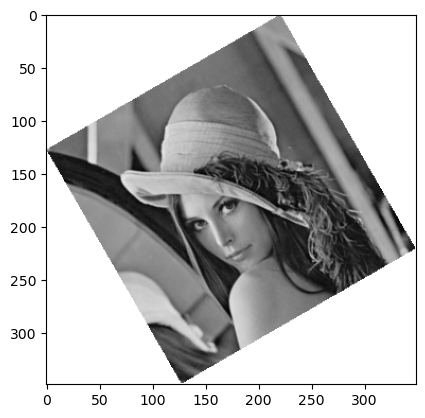

In [725]:
angle = math.pi/6
img1 = rotate_img(img,angle)

# 显示图片
plt.imshow(img1, cmap='gray')
plt.show()